# abcML
## 1. 데이터 가공

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

abc_org = pd.read_csv('/Users/limkahyun/Desktop/small/adcML/abcML.csv')
abc_df = abc_org.copy()
abc_df.head()

,elapseTime,radius,radiusSet,RFPowerVoltage,RFPowerCurrent,RFPower,RFPowerPercent,RFPowerPercentSet,RFPowerCtrlVoltage,MotorArotAng,MotorBrotAng,MotorAspeed,MotorBspeed,MotorACtrlVoltage,MotorBCtrlVoltage,weight,height,growthHeight,growthHeightSet,dateTime
0,8793.546421,4.778328,10.0,80.9,16.3,1318.67,3.296675,3.244313,1.239512,-1578501.54,-2369077.20,-5310.571897,-5596.846667,1.396685,1.5,15.614049,14.829902,15.944781,15.242548,2019-12-04 15:28:58Z
1,8793.796491,4.870199,10.0,80.9,16.0,1294.40,3.236000,3.243971,1.239250,-1579738.86,-2370450.24,-5310.571897,-5596.846667,1.396685,1.5,15.594003,14.830329,15.945522,15.242993,2019-12-04 15:28:59Z
2,8794.046955,4.916224,10.0,80.9,16.2,1310.58,3.276450,3.243632,1.239290,-1581285.06,-2372113.98,-5310.571897,-5596.846667,1.396685,1.5,15.594681,14.831245,15.946264,15.243947,2019-12-04 15:28:59Z
3,8794.302287,4.961740,10.0,80.9,15.9,1286.31,3.215775,3.243297,1.239328,-1582267.14,-2373567.30,-5310.571897,-5596.846667,1.396685,1.5,15.545984,14.832216,15.947021,15.244959,2019-12-04 15:28:59Z
4,8794.548455,5.004508,10.0,80.9,16.2,1310.58,3.276450,3.242963,1.239300,-1583928.18,-2374906.50,-5310.571897,-5596.846667,1.396685,1.5,15.548930,14.832643,15.947750,15.245403,2019-12-04 15:28:59Z


In [2]:
abc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28417 entries, 0 to 28416
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   elapseTime           28417 non-null  float64
 1    radius              28417 non-null  float64
 2    radiusSet           28417 non-null  float64
 3    RFPowerVoltage      28417 non-null  float64
 4    RFPowerCurrent      28417 non-null  float64
 5    RFPower             28417 non-null  float64
 6    RFPowerPercent      28417 non-null  float64
 7    RFPowerPercentSet   28417 non-null  float64
 8    RFPowerCtrlVoltage  28417 non-null  float64
 9    MotorArotAng        28417 non-null  float64
 10   MotorBrotAng        28417 non-null  float64
 11   MotorAspeed         28417 non-null  float64
 12   MotorBspeed         28417 non-null  float64
 13   MotorACtrlVoltage   28417 non-null  float64
 14   MotorBCtrlVoltage   28417 non-null  float64
 15   weight              28417 non-null 

### 컬럼 가공
컬럼명에 공백이 있어서 공백제거  
dateTime의 데이터타입이 object이기 때문에 datetim으로 변경하고 년,월,일,시로 분할

In [3]:
abc_df.columns

Index(['elapseTime', ' radius', ' radiusSet', ' RFPowerVoltage',
       ' RFPowerCurrent', ' RFPower', ' RFPowerPercent', ' RFPowerPercentSet',
       ' RFPowerCtrlVoltage', ' MotorArotAng', ' MotorBrotAng', ' MotorAspeed',
       ' MotorBspeed', ' MotorACtrlVoltage', ' MotorBCtrlVoltage', ' weight',
       ' height', ' growthHeight', ' growthHeightSet', ' dateTime'],
      dtype='object')

In [2]:
abc_df.columns = abc_df.columns.str.replace(' ', '')
abc_df.columns

Index(['elapseTime', 'radius', 'radiusSet', 'RFPowerVoltage', 'RFPowerCurrent',
       'RFPower', 'RFPowerPercent', 'RFPowerPercentSet', 'RFPowerCtrlVoltage',
       'MotorArotAng', 'MotorBrotAng', 'MotorAspeed', 'MotorBspeed',
       'MotorACtrlVoltage', 'MotorBCtrlVoltage', 'weight', 'height',
       'growthHeight', 'growthHeightSet', 'dateTime'],
      dtype='object')

In [8]:
# 문자열을 datetime 타입으로 변경. 
abc_df['dateTime'] = abc_df['dateTime'].apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
# abc_df['year'] = abc_df['dateTime'].apply(lambda x : x.year)
abc_df['month'] = abc_df['dateTime'].apply(lambda x : x.month)
abc_df['day'] = abc_df['dateTime'].apply(lambda x : x.day)
abc_df['hour'] = abc_df['dateTime'].apply(lambda x: x.hour)
abc_df.head(3)

abc_df['year'] = abc_df['dateTime'].dt.year

In [9]:
abc_df.drop(['dateTime'], axis=1,inplace=True)
abc_df.head(3)

,elapseTime,radius,radiusSet,RFPowerVoltage,RFPowerCurrent,RFPower,RFPowerPercent,RFPowerPercentSet,RFPowerCtrlVoltage,MotorArotAng,...,MotorACtrlVoltage,MotorBCtrlVoltage,weight,height,growthHeight,growthHeightSet,month,day,hour,year
0,8793.546421,4.778328,10.0,80.9,16.3,1318.67,3.296675,3.244313,1.239512,-1578501.54,...,1.396685,1.5,15.614049,14.829902,15.944781,15.242548,12,4,15,2019
1,8793.796491,4.870199,10.0,80.9,16.0,1294.40,3.236000,3.243971,1.239250,-1579738.86,...,1.396685,1.5,15.594003,14.830329,15.945522,15.242993,12,4,15,2019
2,8794.046955,4.916224,10.0,80.9,16.2,1310.58,3.276450,3.243632,1.239290,-1581285.06,...,1.396685,1.5,15.594681,14.831245,15.946264,15.243947,12,4,15,2019


### 상관관계 확인

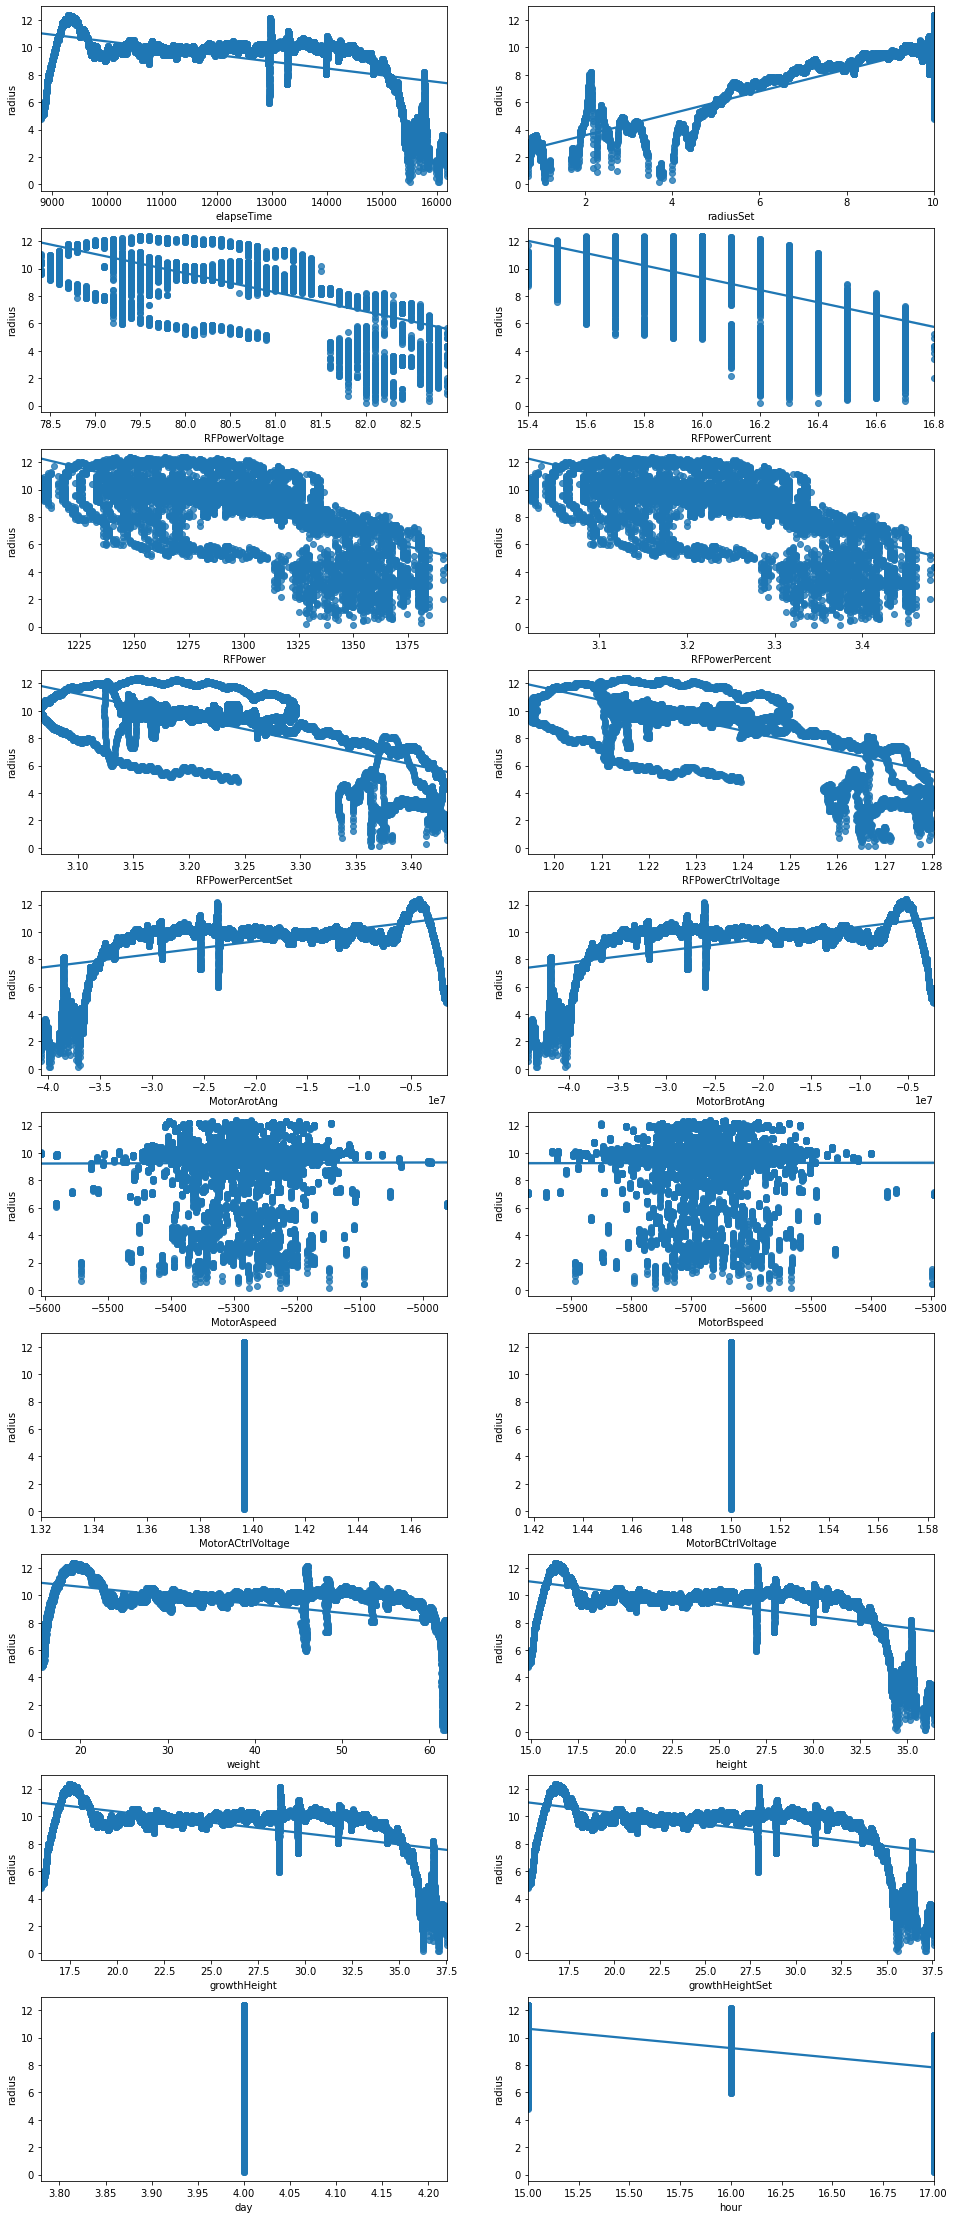

In [7]:
fig, axs = plt.subplots(figsize=(16, 40) , ncols=2 , nrows=10)
lm_features = ['elapseTime','radiusSet','RFPowerVoltage','RFPowerCurrent','RFPower',
               'RFPowerPercent','RFPowerPercentSet','RFPowerCtrlVoltage', 'MotorArotAng',
               'MotorBrotAng', 'MotorAspeed', 'MotorBspeed', 'MotorACtrlVoltage', 'MotorBCtrlVoltage',
               'weight', 'height', 'growthHeight', 'growthHeightSet', 'day', 'hour']

for i , feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='radius', data=abc_df, ax=axs[row][col])

<AxesSubplot:>

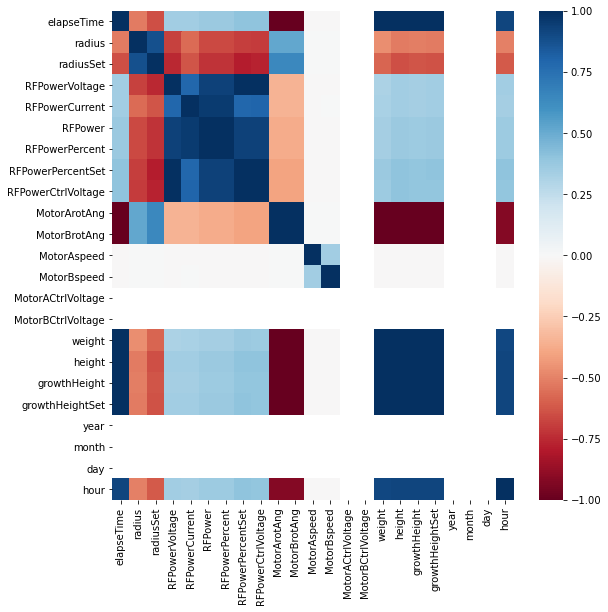

In [8]:
# 히트맵
plt.figure(figsize=(9, 9))
corr = abc_df.corr()
sns.heatmap(corr, cmap='RdBu')

### 사용할 피쳐 추출
RFPowervoltage, RFPowerCurrent, weight, height, hour

In [7]:
# 불필요한 컬럼 삭제
abc_df.drop(['elapseTime','radiusSet','RFPower', 'RFPowerPercent','RFPowerPercentSet',
               'RFPowerCtrlVoltage', 'MotorArotAng', 'MotorBrotAng', 'MotorAspeed',
               'MotorBspeed', 'MotorACtrlVoltage', 'MotorBCtrlVoltage', 'growthHeight',
               'growthHeightSet', 'year', 'month', 'day'],
              axis=1 , inplace=True)
abc_df.head()

,radius,RFPowerVoltage,RFPowerCurrent,weight,height,hour
0,4.778328,80.9,16.3,15.614049,14.829902,15
1,4.870199,80.9,16.0,15.594003,14.830329,15
2,4.916224,80.9,16.2,15.594681,14.831245,15
3,4.961740,80.9,15.9,15.545984,14.832216,15
4,5.004508,80.9,16.2,15.548930,14.832643,15


## 2. 데이터 학습, 예측, 평가

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def check_error(y_test, pred):
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    print('RMSE : ', np.round(rmse, 3))
    
    log_y = np.log1p(y_test)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    print('RMSLE : ', np.round(rmsle, 3))
    
    mae = mean_absolute_error(y_test,pred)
    print('MAE : ', np.round(mae, 3))
    
    mape = mean_absolute_percentage_error(y_test, pred)
    print('MAPE : ', np.round(mape, 3))

In [10]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

# 데이터 분리
y_target = abc_df['radius']
X_features = abc_df.drop(['radius'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

In [12]:
# LinearRegression 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
lr_pred = lr_reg.predict(X_test)

print('LinearRegression 평가')
check_error(y_test, lr_pred)

LinearRegression 평가
RMSE :  0.894
RMSLE :  0.13
MAE :  0.534
MAPE :  0.087


In [13]:
# Ridge 학습, 예측, 평가
rg_reg = LinearRegression()
rg_reg.fit(X_train, y_train)
rg_pred = lr_reg.predict(X_test)

print('Ridge 평가')
check_error(y_test, rg_pred)

Ridge 평가
RMSE :  0.894
RMSLE :  0.13
MAE :  0.534
MAPE :  0.087


In [14]:
# Lasso 학습, 예측, 평가
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
ls_pred = lasso_reg.predict(X_test)

print('Lasso 평가')
check_error(y_test, ls_pred)

Lasso 평가
RMSE :  1.678
RMSLE :  0.242
MAE :  1.147
MAPE :  0.221


In [15]:
# 예측값과 실제값의 오류 차이 확인 top5
def get_top_error_data(y_test, pred, n_tops = 5):
    
    # DataFrame에 컬럼들로 실제 radius와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_radius'])
    result_df['predic_radius']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_radius'] - result_df['predic_radius'])
    
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,lr_pred,n_tops=5)

      real_radius  predic_radius      diff
178      0.298572            6.0  5.701428
1696     4.933669           10.0  5.066331
5643     1.038544            6.0  4.961456
2379     5.173432           10.0  4.826568
4408     5.210062           10.0  4.789938


<AxesSubplot:>

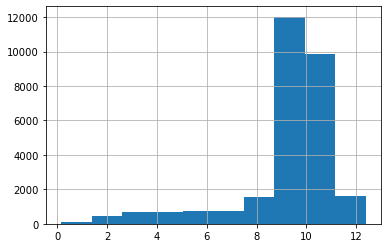

In [16]:
# 타겟 데이터 분포도 확인 >> log, log1p, log10해봤는데 원본이 가장 좋은 모양이라 원본 사용
abc_df['radius'].hist()

In [17]:
# 데이터값 범위 확인 >> RFPowerVoltage값이 커서 스케일링 진행
abc_df.describe()

,radius,RFPowerVoltage,RFPowerCurrent,weight,height,hour
count,28417.000000,28417.000000,28417.000000,28417.000000,28417.000000,28417.000000
mean,9.274283,80.277535,16.013418,41.259053,25.247305,15.969912
std,1.959032,0.956817,0.248758,14.318910,6.047847,0.702144
min,0.152485,78.400000,15.400000,15.486530,14.829902,15.000000
25%,9.405920,79.600000,15.800000,29.017083,20.020813,15.000000
50%,9.833349,80.000000,16.000000,41.503613,25.221968,16.000000
75%,10.114801,80.800000,16.200000,54.529007,30.415411,16.000000
max,12.384785,82.900000,16.800000,62.003393,36.423870,17.000000


### Scaler
* StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler

# 데이터세트에서 y값 제거
abc_x = abc_df.drop(['radius'],axis=1,inplace=False)

# StandardScaler 객체 생성
st_scaler = StandardScaler()

# StandardScaler로 데이터 세트 변환
st_scaler.fit(abc_x)
abc_st = st_scaler.transform(abc_x)

# 데이터프레임으로 변환
abc_df_st = pd.DataFrame(data=abc_st, columns=abc_x.columns)
abc_df_st.describe()

,RFPowerVoltage,RFPowerCurrent,weight,height,hour
count,2.841700e+04,2.841700e+04,2.841700e+04,2.841700e+04,2.841700e+04
mean,1.046736e-15,-3.717679e-15,2.057192e-15,-2.578388e-15,-2.664875e-13
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-1.962306e+00,-2.465969e+00,-1.799926e+00,-1.722528e+00,-1.381382e+00
25%,-7.081254e-01,-8.579503e-01,-8.549663e-01,-8.642056e-01,-1.381382e+00
50%,-2.900653e-01,-5.394108e-02,1.707981e-02,-4.189548e-03,4.285181e-02
75%,5.460549e-01,7.500682e-01,9.267595e-01,8.545516e-01,4.285181e-02
max,2.740870e+00,3.162096e+00,1.448763e+00,1.848056e+00,1.467086e+00


* StandardScaler 이후 예측

In [17]:
# 데이터 분리
y_target = abc_df['radius']
X_features = abc_df_st

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

In [19]:
# LinearRegression 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
lr_pred = lr_reg.predict(X_test)

print('LinearRegression 평가')
check_error(y_test, lr_pred)

LinearRegression 평가
RMSE :  0.894
RMSLE :  0.13
MAE :  0.534
MAPE :  0.087


In [20]:
# Ridge 학습, 예측, 평가
rg_reg = LinearRegression()
rg_reg.fit(X_train, y_train)
rg_pred = lr_reg.predict(X_test)

print('Ridge 평가')
check_error(y_test, rg_pred)

Ridge 평가
RMSE :  0.894
RMSLE :  0.13
MAE :  0.534
MAPE :  0.087


In [21]:
# Lasso 학습, 예측, 평가
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
ls_pred = lasso_reg.predict(X_test)

print('Lasso 평가')
check_error(y_test, ls_pred)

Lasso 평가
RMSE :  1.74
RMSLE :  0.253
MAE :  1.092
MAPE :  0.226


* MinMaxScaler

In [23]:
from sklearn.preprocessing import MinMaxScaler

# 데이터세트에서 y값 제거
abc_x = abc_df.drop(['radius'],axis=1,inplace=False)

# 객체생성
mm_sclaer = MinMaxScaler()

# MinMaxScaler로 변환
mm_sclaer.fit(abc_x)
abc_mm = mm_sclaer.transform(abc_x)

# 데이터프레임으로 변환
abc_df_mm = pd.DataFrame(data=abc_mm, columns=abc_x.columns)
abc_df_mm.describe()

,RFPowerVoltage,RFPowerCurrent,weight,height,hour
count,28417.000000,28417.000000,28417.000000,28417.000000,28417.000000
mean,0.417230,0.438156,0.554047,0.482422,0.484956
std,0.212626,0.177684,0.307822,0.280071,0.351072
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.266667,0.285714,0.290874,0.240387,0.000000
50%,0.355556,0.428571,0.559304,0.481249,0.500000
75%,0.533333,0.571429,0.839319,0.721753,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000


* MinMaxScaler 이후 예측

In [25]:
# 데이터 분리
y_target = abc_df['radius']
X_features = abc_df_mm

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

In [26]:
# LinearRegression 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
lr_pred = lr_reg.predict(X_test)

print('LinearRegression 평가')
check_error(y_test, lr_pred)

LinearRegression 평가
RMSE :  0.894
RMSLE :  0.13
MAE :  0.534
MAPE :  0.087


In [34]:
# Ridge 학습, 예측, 평가
rg_reg = LinearRegression()
rg_reg.fit(X_train, y_train)
rg_pred = lr_reg.predict(X_test)

print('Ridge 평가')
check_error(y_test, rg_pred)

Ridge 평가
RMSE :  0.894
RMSLE :  0.13
MAE :  0.534
MAPE :  0.087


In [33]:
# Lasso 학습, 예측, 평가
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
ls_pred = lasso_reg.predict(X_test)

print('Lasso 평가')
check_error(y_test, ls_pred)

Lasso 평가
RMSE :  1.955
RMSLE :  0.274
MAE :  1.249
MAPE :  0.256


## 결론
사용한 컬럼 : RFPowerVoltage, RFPowerCurrent, weight, height, hour  
스케일링 적용해도 원본의 결과와 큰 변화 없음  
Linear, Rigde모델 사용 >> mape값이 0.087